In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


there is no null values

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data_no_mv = data.copy()

In [6]:
data1 = data_no_mv.copy()

In [7]:
data1['smoker'] = data['smoker'].map({'yes':1, 'no':0})

data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [8]:
dummies = pd.get_dummies(data['sex'])

In [9]:
dummies

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
ohe = OneHotEncoder()

feature_array = ohe.fit_transform(data1[['region']]).toarray()

In [12]:
feature_labels = ohe.categories_

print(feature_labels)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [13]:
feature_labels = np.array(feature_labels).ravel()

print(feature_labels)

['northeast' 'northwest' 'southeast' 'southwest']


In [14]:
features = pd.DataFrame(feature_array, columns = feature_labels)

features.head()

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [15]:

data_new = pd.concat([data1, dummies, features], axis=1)

data_new = data_new.drop(columns='region', axis=1)
data_new = data_new.drop(columns='sex', axis=1)

data_new.head()

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,3866.85520,0,1,0.0,1.0,0.0,0.0


In [16]:
data_new.corr()['charges'].sort_values()

female      -0.057292
southwest   -0.043210
northwest   -0.039905
northeast    0.006349
male         0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

<AxesSubplot:>

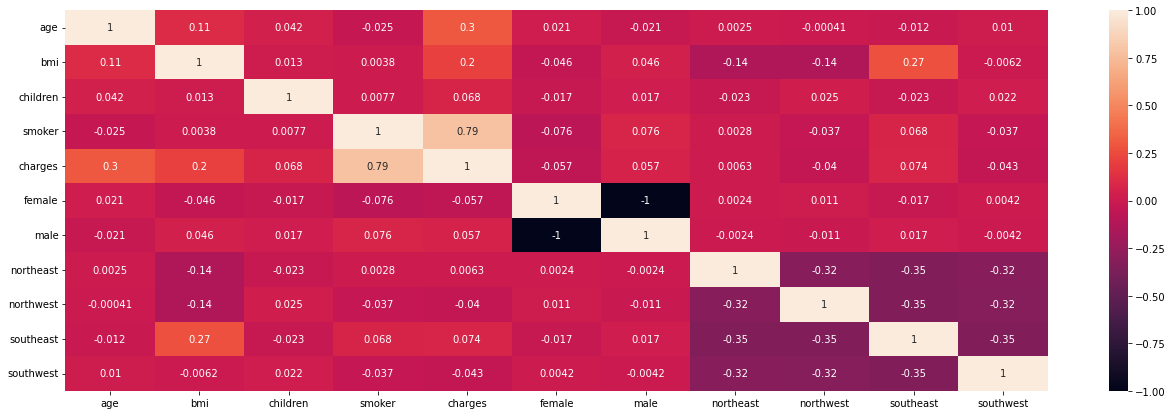

In [17]:
plt.figure(figsize=(22,7))
sns.heatmap(data_new.corr(),annot=True)

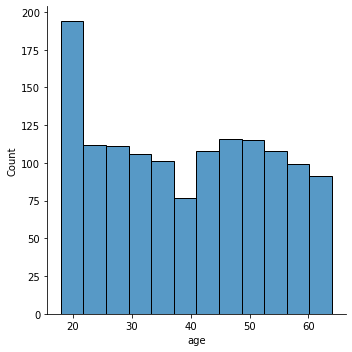

In [18]:
sns.displot(data_new['age'])
plt.show()

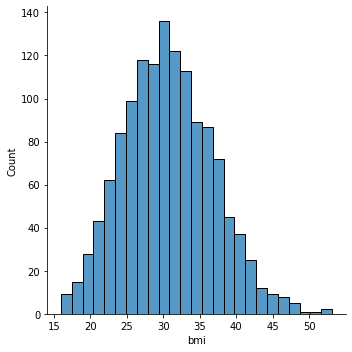

In [19]:
sns.displot(data_new['bmi'])
plt.show()

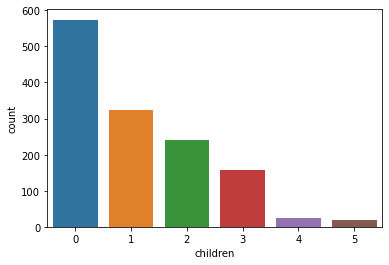

In [20]:
sns.countplot(x = 'children', data = data_new)
plt.show()

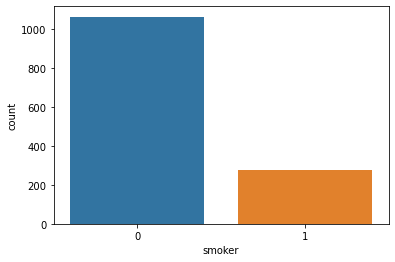

In [21]:
sns.countplot(x = 'smoker', data = data_new)

plt.show()

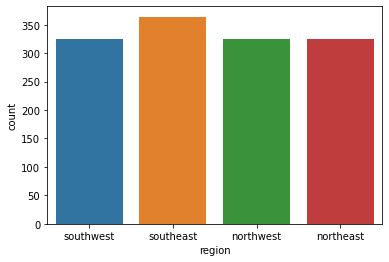

In [22]:
sns.countplot(x = 'region', data = data)
plt.show()

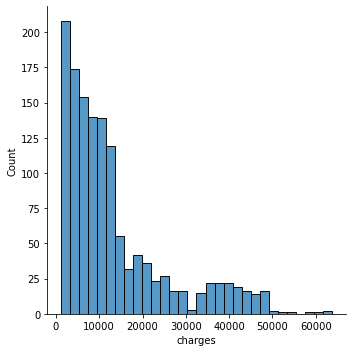

In [23]:
sns.displot(data_new['charges'])
plt.show()

In [24]:
y=data_new['charges']
x=data_new.drop(columns=['charges'])


In [25]:
x

,age,bmi,children,smoker,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,1,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,1,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,1,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,1,0,0.0,0.0,0.0,1.0


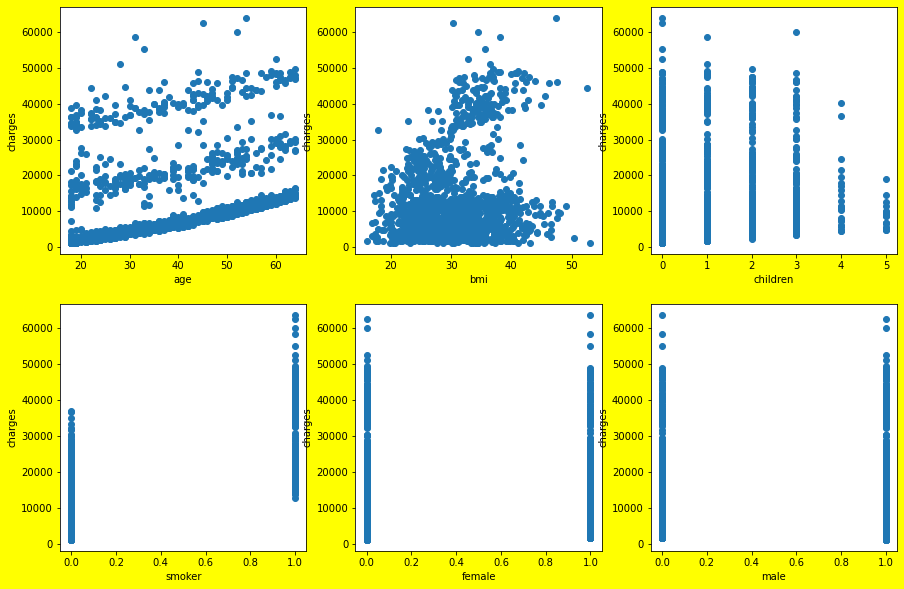

In [26]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('charges', fontsize=10)
        
    plotnumber+=1
plt.show()

In [27]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [29]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = regression.predict(x_train.values)

In [31]:
from sklearn import metrics

r2_train = metrics.r2_score(y_train, y_pred)

print('R squared value: ',r2_train)

R squared value:  0.7520187377309014


In [32]:
test_data_pred = regression.predict(x_test.values)

In [33]:
r2_test = metrics.r2_score(y_test, test_data_pred)

print('R squared value: ',r2_test)

R squared value:  0.7449415564623687


In [34]:
# features used: age:31, sex:female, bmi:25.74, children:0, smoker:no, region:southeast

input_data = (31, 25.74, 0, 0, 1, 0, 0, 0, 1, 0)

In [35]:
# changing inupt_data into numpy array

array_data = np.asarray(input_data)

In [36]:
array_data_reshaped = array_data.reshape(1,-1)

In [37]:
prediction = regression.predict(array_data_reshaped)

print('The insurance charge is ',prediction)

The insurance charge is  [3811.11420936]


The original price is 3756.8552. Our model's predictions are close to the original price, therefore the model is complete